In [6]:
# get data
import os
import urllib.request

data_location = "../data/nycflights13/flights.csv.gz"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/nycflights13/flights.csv.gz'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        urllib.request.urlretrieve(data_url, data_location)
        print ('Downloading : ', data_url)
print('data_location :', data_location)  

data_location : flights.csv.gz


In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format
flights = pd.read_csv(data_location)
flights.sample(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
49635,2013,10,25,807.00,815,-8.00,952.00,947,5.00,9E,4326,N602XJ,JFK,BUF,55.00,301,8,15,2013-10-25 08:00:00
311398,2013,9,3,"1,510.00",1439,31.00,"1,643.00",1607,36.00,9E,3712,N8409N,JFK,BWI,35.00,184,14,39,2013-09-03 14:00:00
224714,2013,6,3,"2,017.00",2013,4.00,"2,301.00",2304,-3.00,UA,1675,N39726,EWR,IAH,199.00,1400,20,13,2013-06-03 20:00:00
165907,2013,4,1,"1,938.00",1859,39.00,"2,046.00",2027,19.00,9E,4091,N8736A,JFK,BWI,43.00,184,18,59,2013-04-01 18:00:00
47322,2013,10,22,"1,833.00",1835,-2.00,"2,150.00",2146,4.00,DL,2391,N995DL,JFK,TPA,168.00,1005,18,35,2013-10-22 18:00:00


In [8]:
mean_delay_by_month = flights.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1     6.13
2     5.61
3     5.81
4    11.18
5     3.52
6    16.48
7    16.71
8     6.04
9    -4.02
10   -0.17
11    0.46
12   14.87
Name: arr_delay, dtype: float64

<AxesSubplot:title={'center':'Mean Delay By Month'}, xlabel='month'>

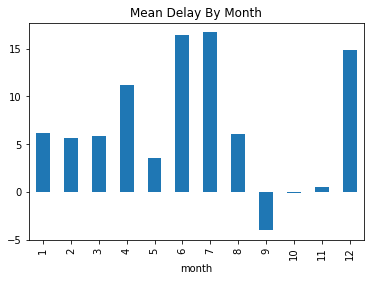

In [9]:
mean_delay_by_month.plot(kind='bar', title="Mean Delay By Month")

In [10]:
flights[(flights.dest == 'ORD')]

mean_delay_by_month_ord = flights[(flights.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
mean_delay_by_month_ord

month
1     7.29
2     3.68
3    -2.70
4    19.18
5     7.94
6    13.30
7     8.41
8     4.26
9    -4.75
10   -1.60
11    2.07
12   16.46
Name: arr_delay, dtype: float64

<AxesSubplot:title={'center':'Mean Delay By Month per destination'}, xlabel='month'>

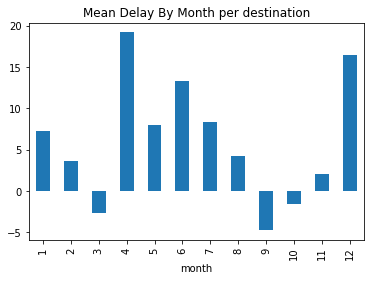

In [11]:
mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month per destination")